# Cookie Chronicler Logbook

#### Computational Creativity - Assignment 1

##### Titus Oosting (s2683466)

### Introduction

In this logbook I describe the process of building a cookie-recipe generator that uses the theories of Genetic Algorithms to produce novel recipes - and then evaluate its creativity. 

The product required:

* An Inspiring Set (Cookie Knowledgebase)
* A Fitness Metric
* Parent Selection
* Recipe Crossover 
* Recipe Mutation
* Offspring Integration
* Recipe Template Generator

The results of this project are best summarised in the Cookie Chronicle Cookbook. 


The most interesting problem I had to solve in building the generator was how to assess the "fitness" of a cookie recipe (and so the format of the initial recipe data-set). I go into more detail into how I approached this problem below but (sneak peek ahead!) I thought about the problem both in terms of the inherent structure of the recipe and in terms of how the recipe might be preferable in different conditions (`environment_condition` variable in the `CookieGenerator` Class).


It’s a cookie-eat-cookie world out there. The longevity of a family recipe depends on both the inherent structure (relative proportion of ingredients) and the environment in which they find themselves. In a family of health nuts, the recipes with higher proportion of 'chunks', and lower sugar content, might be more likely to survive. In a family of 'toothless' young kids perhaps the recipes with less 'chunky' bits will survive. 


### What’s in a Cookie: Creating a Knowledgebase

This application requires an existing 'knowledgebase': a data-set of recipes that serves not only as an initial population, but is also used to infer "Fitness" ideals
(`purpose_average_proportions`) through its metadata.

For this project I took 35 recipes from this [top 107](https://www.epicurious.com/recipes-menus/best-cookie-recipes-chocolate-chip-raisin-peanut-butter-gallery) and manually recored the data in google sheets, saved as csv for my application. 

What kind of data do you need in this knowledgebase? This question is actually dictated by the rest of the application's development. The information required for fitness and for presenting the recipes in the Cookbook: 

* Ingredient Name
* Amount
* Purpose for determining fitness values
* Specific actions to alter the composition, purpose or flavour of individual ingredients
* Specific orders and combinations in which to combine ingredients


For this specific application, the recipe'steps' were eventually collected for 'aesthetic' e.g for recipe presentation, rather than mechanical purposes, used only in the 'outputting' functions. 

To assess the fitness of the cookie recipe each ingredient for each inspiring recipe were manually categorised into one of several categories. With a large inspiring set perhaps some unsupervised methods could be used to infer the relevant purposes, here I used mostly my baking experience (& Google)!

These include:

* Structure
* Fat
* Flavor
* Sugar
* Binding
* Chunks
* Rising

This data was collected in two separate Google Sheets -> csvs -> Pandas DataFrames, 'Recipes' and 'Ingredients'. The first few lines of each dataset is shown below. 


In [17]:
cookie = CookieGenerator()
recipes = cookie.import_data(cookie.file_path_recipes)
ingredients = cookie.import_data(cookie.file_path_ingredients)
recipes.head()

,Name,marker,ingredient,subtype,amount,units,Servetype-for-output
0,Frosted Malt-Chocolate Cookies,bake,chocolate,milk,6.00,oz,cookie cutter
1,Frosted Malt-Chocolate Cookies,NaN,sugar,darkbrown,0.75,cup,NaN
2,Frosted Malt-Chocolate Cookies,NaN,cocoa powder,NaN,0.50,cup,NaN
3,Frosted Malt-Chocolate Cookies,NaN,cream,heavy,0.66,cup,NaN
4,Frosted Malt-Chocolate Cookies,NaN,milk powder,malted,2.00,tbsp,NaN


In [18]:
ingredients.head()

,Ingredient,Purpose,Consistency,Operators-for-output
0,flour,Structure,dry,sift
1,butter,Fat,wet,melt
2,oil,Fat,wet,heat
3,salt,Flavor,dry,NaN
4,oats,Structure,dry,NaN


### A cookie for your thoughts: From the Technical to the Creative

The code for the product is fully encapsulated in the `cookie_class.py` file. Have a look a the example code at the end of this file. The code for the algorithm was built from scratch as the standard libraries lacked the flexibility I wanted. Running end to end (`run_genetic_algorithm`) does the following:

* Importing Data
* Manipulating Imported Data (converting all measurements to grams)
* Inferring Ideal Fitness Benchmarks

For `num_generations` iterations:
* Calculating Poulation Fitness
* Select Parents
* Crossover 
* Mutation
* Integration
* Extinction (see below)
* Recalculating Population Fitness
* Tracking Population Max & Total Fitness for Stopping Criteria
* Terminating once Stopping Criteria Met

Finally:
* Plots Population Max & Total Fitness against Generations
* Selects Final Recipe
* Presents the Final Recipe (See the Cookbook for the Format)


#### Fitness


For CookieGeneration, the primary fitness determiner is a 'balance of purposes'. From the knowledgebase of original recipes, an 'optimal average' balance is inferred, against which each newly generated recipe is compared. The distance of a recipe from the ideal can be measured either through Manhattan or Euclidean distance (`fitness_method` variable when initializing CookieGenerator Class):

Additionally to allow for differing environment conditions you can provide an `environment_condition` to the which adjust the ideal proportions of ingredients according to the preference specified:

* Cookie Cutter - default
* Sweet Tooth - sugar proportion adjusted up
* Health nut - sugar proportion adjusted down, chunky proportion adjusted up 
* Toothless - chunky proportion adjusted down

The cookbook displays an example recipes after running the above algorithm for 1000 generations with each environment condition above and Manhattan distance. 

**Note**: The recipe balance is derived from the proportions of the ingredients in grams relative to each other.


#### Parent Selection

We want to select parents that score high on fitness, but to prevent stagnation and uniformity, two parents are selected from the top-x (`parent_selection_size`, default 10) best scoring parents of the current population.

#### Crossover & Mutation


* A set of two parents creates one new offspring, which is stitched together from the start of one parent and the end of another. The crossover point is here determined as a random index from 1 to the length of the shortest recipes. 

* Mutation occurs with `mutation_chance` (default 20%) , where an ingredient is replaced by another random ingredient (though the quantity in grams remains the same). 

#### Extinction Events

Imagine a physical recipe book. 
A few pages might be smudgeoned or torn out; perhaps a whole book lost, or a family member might unexpectedly pass and take a hot-take recipe to the grave.
Cookie Generator has a small (`extinction_event_chance`, default 1% recipes across all generations) chance for an 'extinction event', where a randomly-chosen recipe disappears from the tangles of history. 

#### Stopping Criteria

When is Cookie Generator ready to output a recipe? Running by a specific number of generations is fine, but it might be able to 'decide on its own'. If the fitness of the best-scoring recipes has not improved for a previos certain number of generations (`stopping_criteria_runs`), the Generator is satisfied. 

#### Outputting Recipes

A vital element of the Generator's creativity is the translation of a technical product to a human-readable, and 'creative' recipe. Some variation between recipes is a necessity, where too-similar looking outputted recipes would quickly lose their creative shine. 

##### Name Generation

Cookie Generator creates a unique name based on its ingredient-set (uses purpose of ingredient to choose a Flavour & Chunky to include in name)  and a list of whimsical descriptives derived from the original imported recipes. 

##### Shopping List

The is the essence of the final recipe. The inherited ingredients & quantities (in grams).

##### Instruction

The purpose of each final ingredient is used to organise the instructions into sensible steps. For example those ingredients (e.g. `sparking sugar`) that have decorate purpose are included in the final step. 

##### Bake or No Bake

I also allowed for both non and bake recipes by determining whether the recipe has eggs and altering the output instructions based on this. 
 


### Future development

**Ingredient Subtypes**
The recipe sheet has a column not just for ingredients, but one for specific subtypes; a lot of these recipes have 'unsalted' butter, 'kosher' salt or 'white' chocolate.
In its current implementation, these subtypes are not used; I did not manage to finish (or more importantly, then integrate) the function that reads these subtypes and creates an extra batch of unique ingredients, which would easily double the amount of individual ingredients and so increase variability of the generated recipes. 

**Improved Fitness: Assocation**

Some ingredients just work well with others. By counting, for each ingredient, the amount of times it is used in combination with each other ingredient, a large but straightforward dictionary of values can be used to see how well the ingredients of a recipe 'mesh together'. This principle is somewhat comparable to the 'purpose' approach that is currently used.

**Improved Fitness: Order**

The order in which ingredients are listed in the recipe are directly mapped to the order in which they are 'used' in the original recipe. With some clever inferring, some generalisations could be made for certain ingredients, and this could be checked against generated recipes. 

**Improved Fitness: Wet and Dry**

One piece of metadata that was un-used is the division of 'wet' and 'dry' ingredients. Desirable roportions of this quality for a recipe's ingredients could be inferred from the knowledgebase, and compared to generated recipes. This could also be used in the recipe presentation.




**Improved Outputting: Ingredient Operators** 

The very next to-do step in line before the deadline crush was to incorporate another column of currently unused meta-data: the Ingredient sheet's Operators. Some ingredients had specific 'actions' that are common to their use, eg. 'whip' for cream or 'sift' for flour.
These operators were to be added with some random chance (but following some rules) in the outputted recipe steps, for significant additional variation. 

**Improved Outputting: Family Story** 

The bane -or charm?- of online recipes is the introductory story that no one wants to read. While its implications can be debated, a unique short story preceding a generated recipe would certainly add to its uniqueness and creative appearance.

**Improved Outputting: Smarter Names** 

Perhaps some more detailed look at the ingredients and using synonyms for environment conditions I could create more imaginative names. 

**Improved Outputting: Reconvert Ingredients** 

The shopping list of ingredients for each recipe currentl only outputs in grams. This would be more pleasing if presented in the 'original', or most-commonly-used-when-importing, measure types. 

### Reflections on Creativity

Cookie Generator is irrefutably a combinational creative system: its generated recipes are numerous and (potentially) near-infinite, highly dependent on the dataset from which its combinations are drawn.

There is little conceptual space here to explore or transform; even considering above additional developments, the primary improvement would be our perception of its creativity, not its fundamental capabilities.

But these recipes are unique, individual, and many of them probably 'workable' in the kitchen. Each of its creations is just that - the result of a technical creative process. 

By improving the recipe-outputting, its 'believability' factor might significantly improve, and by optimizing the dataset and fitness determining, the recipes might, on average, come out of the oven a little tastier. Properly developing these two axes might create a recipe-generator that is 'legit' in an aesthetic and operational sense - depending on the viewer's tastes.

In assessing the creativty I considered the creativity allowed in the algorithm and the creativity 'mocked' in the recipe output:

* Over serveral iterations of my algorithm I included more 'tweakable' elements to increase the inherent creativeness of the product. This is most directly seen with both the inclusion of an `environment condition` which allows for the creative inclusion of a 'genetic context' and the adaptation of the classic approach to include extinciton events, which introduces futher variablity. However, for an application with a purpose, this consideration seems less relevant; if we are going to take the effort to bake (and eat) cookies, the quality and clarity of the recipe we are using is entirely more significant than however that recipe was created. The standard of creativity here is the output - not the process.  

* The recipe output simulates creativity with both its name generation & use of purpose to indicate steps taken.





### Example Code

In [ ]:
from cookie_class import CookieGenerator

In [11]:
cookie = CookieGenerator(environment_condition = "Sweet Tooth")

Hello Cookie Monster 🍪 ... now running the genetic algorithm for 100 generations!
Good Luck 👍


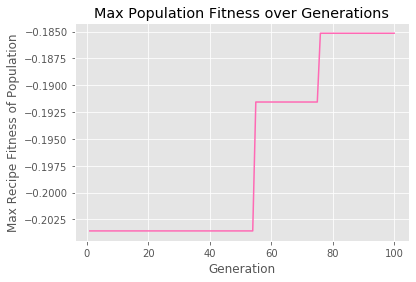

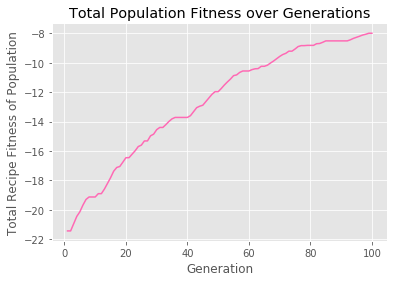

# Golden Salt Almonds Cookies

## A Sweet Tooth recipe

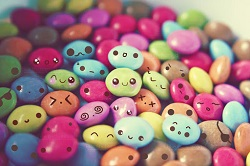

This recipe has been generated by a genetic algorithm!

## Shopping List  🛒


|  Ingredient | Amount |
|-------------- | -------------- | 
| Almonds | 160.0 grams | 
| Flour | 320.0 grams | 
| Salt | 3.0 grams | 
| Almond paste | 160.0 grams | 
| Butter | 220.0 grams | 
| Sugar | 160.0 grams | 
| Sugar | 80.0 grams | 
| Salt | 50.0 grams | 
| Egg | 50.0 grams | 



### Step 1  🥣

Preheat the oven to 180 degrees and place the **Flour**, **Sugar**, **Almond paste** in a bowl & mix.

### Step 2  🥄

Add in the **Butter**, **Egg** and mix until you have an elastic dough that can be shaped in cookies.

### Step 3  🌈

Fold in **Salt**, **Almonds**.

### Step 4  ✨

Using your hands, roll out the cookie dough and cut into shapes of your choosing.

### Step 5  🔥

Cook the cookies in the oven for approximately 20 minutes.

### Step 6 😋

Serve & enjoy!

In [12]:
cookie.run_genetic_algorithm(100) 